# Compare Filters

LTA_4_Compare-Filters.ipynb

This page is meant to illustrate the effect of different filters on hydrology data.

Three sample times will be chosen and the filters will be applied to the data in turn.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import analysis_functions as my
from analysis_functions import filter
# filter(data, 
#        order=2, 
#        cutoff='130 minutes', # or ['7 days', '130 minutes'] for bandpass
#        sample_period='auto', 
#        filter_type='lowpass', 
#        filter_method='butterworth'  # or 'bessel'
#       )

print("Analysis_functions version: ", my.__version__)
stations = pd.read_parquet('stations.parquet')

Analysis_functions version:  2025.06.09


## Filter list & implementation

In [2]:
depth = pd.read_parquet("WBdata-depth.parquet").interpolate()
print(f"Number of NaNs: {depth.isna().sum().sum()}") #All nans should be filled by interpolation.
filter_list = {'raw_depth': depth}

filter_list['low61m'] = filter(depth, cutoff='61 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low61m_bessel'] = filter(depth, cutoff='61 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='bessel')
filter_list['low130m'] = filter(depth, cutoff='130 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low196m'] = filter(depth, cutoff='196 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low196m_bessel'] = filter(depth, cutoff='196 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='bessel')
filter_list['low556m'] = filter(depth, cutoff='556 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low886m'] = filter(depth, cutoff='886 minutes', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low1day'] = filter(depth, cutoff='1 day', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low3day'] = filter(depth, cutoff='3 days', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low7day'] = filter(depth, cutoff='7 days', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low14day'] = filter(depth, cutoff='14 days', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')
filter_list['low21day'] = filter(depth, cutoff='21 days', sample_period='15 minutes', filter_type='lowpass', filter_method='butterworth')

filter_list['hi61m'] = filter(depth, cutoff='61 minutes', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi61m_bessel'] = filter(depth, cutoff='61 minutes', sample_period='15 minutes', filter_type='highpass', filter_method='bessel')
filter_list['hi130m'] = filter(depth, cutoff='130 minutes', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi196m'] = filter(depth, cutoff='196 minutes', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi1day'] = filter(depth, cutoff='1 day', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi3day'] = filter(depth, cutoff='3 days', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi7day'] = filter(depth, cutoff='7 days', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi14day'] = filter(depth, cutoff='14 days', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')
filter_list['hi21day'] = filter(depth, cutoff='21 days', sample_period='15 minutes', filter_type='highpass', filter_method='butterworth')

filter_list['depth_diff'] = depth.diff()
filter_list['low61m_diff'] = filter_list['low61m'].diff()
filter_list['low130m_diff'] = filter_list['low130m'].diff()
filter_list['low196m_diff'] = filter_list['low196m'].diff()
filter_list['low556m_diff'] = filter_list['low556m'].diff()
filter_list['low1day_diff'] = filter_list['low1day'].diff()

filter_list['band196m61m'] = filter(depth, cutoff=['196 minutes','61 minutes'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')
filter_list['band3d61m'] = filter(depth, cutoff=['3 days','61 minutes'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')
filter_list['band1d130m'] = filter(depth, cutoff=['1 day','130 minutes'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')
filter_list['band1d196m'] = filter(depth, cutoff=['1 day','196 minutes'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')
filter_list['band7d130m'] = filter(depth, cutoff=['7 days','130 minutes'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')
filter_list['band7d196m'] = filter(depth, cutoff=['7 days','196 minutes'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')
filter_list['band7d1d'] = filter(depth, cutoff=['7 days','1 day'], sample_period='15 minutes', filter_type='bandpass', filter_method='butterworth')

filter_list['stop196m61m'] = filter(depth, cutoff=['196 minutes','61 minutes'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')
filter_list['stop3d61m'] = filter(depth, cutoff=['3 days','61 minutes'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')
filter_list['stop1d130m'] = filter(depth, cutoff=['1 day','130 minutes'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')
filter_list['stop1d196m'] = filter(depth, cutoff=['1 day','196 minutes'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')
filter_list['stop7d130m'] = filter(depth, cutoff=['7 days','130 minutes'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')
filter_list['stop7d196m'] = filter(depth, cutoff=['7 days','196 minutes'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')
filter_list['stop7d1d'] = filter(depth, cutoff=['7 days','1 day'], sample_period='15 minutes', filter_type='bandstop', filter_method='butterworth')


Number of NaNs: 0


## Find Peaks & lags between peaks for three samples, plus errors

for each transformation, find:
- the peak and the time of the peak
- the lag between peaks for each reach
- the 'time error': the difference between when the peak occurred in the transform data, minus in the raw data
- the 'lag error': the difference between the length of lag for each method and for the raw data

In [3]:
sample_windows = [('2014-08-03 12:00','2014-08-06'),
                  ('2015-04-03','2015-04-06'),
                  ('2015-10-16','2015-10-24'),
                 ]
index_list = [filter_list.keys(), stations.index, range(len(sample_windows))]
my_index = pd.MultiIndex.from_product(index_list, names=["method", "reach", "sample_id"])
maxes = pd.DataFrame(index=my_index).reset_index()
row = None
def calc_maxes(row):
    method = row['method']
    reach = row['reach']
    sample_id = row['sample_id']
    data = filter_list[method]
    start, stop = sample_windows[sample_id]
    peak = data.loc[start:stop, reach].max()
    time = data.loc[start:stop, reach].idxmax()
    cumsum = data.loc[start:stop, reach].sum()
    return (time, peak, cumsum)

maxes[['time','peak', 'sum']] = maxes.apply(calc_maxes, axis=1, result_type='expand')
maxes = maxes.set_index(['method', 'reach', 'sample_id']).unstack('reach')
lags = maxes.loc[:,('time')].diff(axis=1)
lags.columns = [('lag', '01541200'), ('lag', '01541303'), ('lag', '01542500'), ('lag', '01545500'), ('lag', '01551500')]
maxes = pd.concat([maxes, lags], axis=1)
maxes.columns.names=['stat','reach']
maxes = maxes.stack('reach', future_stack=True)
lag0 = maxes.loc[('raw_depth'), 'lag']
maxes['lag_error'] = maxes['lag']-lag0
time0 = maxes.loc[('raw_depth'), 'time']
maxes['time_error'] = maxes['time']-time0
maxes

stat                                                time      peak  \
method      sample_id reach                                          
band196m61m 0         01541200 2014-08-03 21:30:00+00:00  0.049921   
                      01541303 2014-08-03 21:45:00+00:00  0.009455   
                      01542500 2014-08-04 12:30:00+00:00  0.028670   
                      01545500 2014-08-05 00:00:00+00:00  0.006868   
                      01551500 2014-08-05 23:15:00+00:00  0.016064   
...                                                  ...       ...   
stop7d1d    2         01541200 2015-10-16 05:30:00+00:00  0.365428   
                      01541303 2015-10-19 19:45:00+00:00  0.290228   
                      01542500 2015-10-16 00:45:00+00:00  0.496495   
                      01545500 2015-10-19 02:30:00+00:00  0.738192   
                      01551500 2015-10-16 07:45:00+00:00  0.852106   

stat                                   sum               lag  \
method      sample_id reach                                    
band196m61m 0         01541200   -0.002376               NaT   
                      01541303    0.001940   0 days 00:15:00   
                      01542500    0.000876   0 days 14:45:00   
                      01545500   -0.000688   0 days 11:30:00   
                      01551500   -0.000108   0 days 23:15:00   
...                                    ...               ...   
stop7d1d    2         01541200  310.489036               NaT   
                      01541303  241.883838   3 days 14:15:00   
                      01542500  411.014734 -4 days +05:00:00   
                      01545500  606.968142   3 days 01:45:00   
                      01551500  705.875010 -3 days +05:15:00   

stat                                   lag_error        time_error  
method      sample_id reach                                         
band196m61m 0         01541200               NaT   0 days 01:00:00  
                      01541303 -1 days +21:15:00 -1 days +22:15:00  
                      01542500   0 days 00:30:00 -1 days +22:45:00  
                      01545500 -1 days +23:45:00 -1 days +22:30:00  
                      01551500 -1 days +21:30:00 -1 days +20:00:00  
...                                          ...               ...  
stop7d1d    2         01541200               NaT -7 days +13:45:00  
                      01541303   7 days 23:45:00   1 days 13:30:00  
                      01542500 -3 days +23:15:00 -1 days +12:45:00  
                      01545500   1 days 22:30:00   1 days 11:15:00  
                      01551500 -2 days +12:45:00   0 days 00:00:00  

[630 rows x 6 columns]

In [4]:
# High pass tends to peak earlier than raw data
# Low pass tends to peak later than raw data
# There are some exceptions: these might have matched on different peaks?
time_test = maxes.groupby(['method', 'sample_id'], sort=False)['time_error'].median().unstack('sample_id').sort_values(0)
time_test

sample_id                      0                 1                 2
method                                                              
low1day_diff   -1 days +20:15:00 -1 days +05:30:00   2 days 07:15:00
low556m_diff   -1 days +21:30:00 -1 days +14:45:00 -1 days +19:45:00
depth_diff     -1 days +21:30:00 -1 days +13:15:00   0 days 00:00:00
low61m_diff    -1 days +21:45:00 -1 days +14:00:00 -1 days +13:15:00
low196m_diff   -1 days +21:45:00 -1 days +09:45:00   1 days 12:30:00
low130m_diff   -1 days +21:45:00 -1 days +09:45:00 -1 days +21:00:00
band196m61m    -1 days +22:30:00   0 days 13:30:00   0 days 00:30:00
hi130m         -1 days +22:30:00   0 days 16:30:00   1 days 06:15:00
hi196m         -1 days +22:30:00   0 days 16:30:00   1 days 06:15:00
hi1day         -1 days +23:30:00 -1 days +21:15:00   0 days 12:00:00
stop7d1d       -1 days +23:30:00   0 days 14:15:00   0 days 00:00:00
band1d196m     -1 days +23:30:00 -1 days +21:00:00   2 days 07:30:00
band1d130m     -1 days +23:30:00 -1 days +21:00:00   1 days 06:30:00
hi3day         -1 days +23:45:00 -1 days +21:00:00   2 days 11:45:00
band3d61m      -1 days +23:45:00 -1 days +21:15:00   1 days 00:00:00
hi21day          0 days 00:00:00   0 days 00:00:00   0 days 04:45:00
stop196m61m      0 days 00:00:00   0 days 00:00:00   0 days 01:00:00
raw_depth        0 days 00:00:00   0 days 00:00:00   0 days 00:00:00
hi7day           0 days 00:00:00 -1 days +23:00:00   3 days 04:15:00
hi14day          0 days 00:00:00 -1 days +23:00:00   2 days 23:45:00
band7d196m       0 days 00:00:00 -1 days +23:15:00   3 days 03:45:00
low196m          0 days 00:15:00   0 days 00:30:00   0 days 00:30:00
low61m_bessel    0 days 00:15:00   0 days 00:00:00   2 days 07:00:00
low61m           0 days 00:15:00   0 days 00:00:00   2 days 07:00:00
low130m          0 days 00:15:00   0 days 00:15:00   0 days 03:30:00
band7d130m       0 days 00:15:00 -1 days +23:15:00   5 days 21:30:00
low196m_bessel   0 days 00:30:00   0 days 00:30:00   2 days 07:45:00
low556m          0 days 00:45:00   0 days 00:30:00   2 days 08:00:00
stop7d196m       0 days 01:15:00   0 days 14:15:00   1 days 02:30:00
low886m          0 days 02:00:00   0 days 00:45:00   2 days 08:00:00
band7d1d         0 days 05:00:00   0 days 00:30:00   6 days 17:30:00
low1day          0 days 05:00:00   0 days 01:30:00   0 days 21:15:00
stop1d130m       0 days 05:30:00   0 days 01:45:00   0 days 19:45:00
stop1d196m       0 days 05:30:00   0 days 01:45:00   0 days 04:45:00
low14day         0 days 06:45:00   1 days 16:30:00   7 days 08:30:00
hi61m_bessel     0 days 07:15:00   0 days 03:30:00   1 days 14:30:00
low3day          0 days 13:15:00   0 days 06:30:00   0 days 13:45:00
hi61m            0 days 14:00:00   0 days 03:30:00   1 days 14:30:00
stop3d61m        0 days 14:00:00   0 days 06:30:00   0 days 14:45:00
stop7d130m       0 days 14:00:00   0 days 14:15:00   1 days 02:30:00
low7day          0 days 17:00:00   0 days 12:15:00   0 days 22:30:00
low21day         2 days 10:00:00   2 days 09:00:00   7 days 08:30:00

In [5]:
lag_test = maxes['lag_error'].abs().groupby(['method', 'sample_id'], sort=False).median()
lag_test.unstack('sample_id').sort_values(2)

sample_id                    0               1               2
method                                                        
raw_depth      0 days 00:00:00 0 days 00:00:00 0 days 00:00:00
low130m        0 days 00:15:00 0 days 00:15:00 0 days 03:30:00
stop1d196m     0 days 01:00:00 0 days 00:45:00 0 days 04:45:00
band3d61m      0 days 00:15:00 0 days 01:15:00 0 days 12:00:00
hi130m         0 days 03:00:00 0 days 16:00:00 0 days 16:15:00
hi3day         0 days 00:15:00 0 days 01:15:00 0 days 16:30:00
stop196m61m    0 days 00:15:00 0 days 00:00:00 0 days 23:15:00
stop3d61m      0 days 00:45:00 0 days 02:15:00 1 days 01:00:00
low3day        0 days 00:30:00 0 days 00:45:00 1 days 01:45:00
band196m61m    0 days 00:30:00 0 days 12:30:00 1 days 04:30:00
hi1day         0 days 00:00:00 0 days 01:15:00 1 days 06:15:00
low21day       0 days 11:45:00 0 days 04:30:00 1 days 07:30:00
low14day       0 days 06:30:00 0 days 03:45:00 1 days 07:30:00
low7day        0 days 00:45:00 0 days 01:00:00 1 days 09:30:00
stop7d196m     0 days 21:30:00 0 days 03:30:00 1 days 10:15:00
stop7d130m     0 days 03:45:00 0 days 03:30:00 1 days 10:15:00
hi14day        0 days 00:00:00 0 days 00:30:00 1 days 10:15:00
band1d196m     0 days 00:00:00 0 days 02:00:00 1 days 11:15:00
hi61m_bessel   0 days 06:00:00 0 days 19:45:00 1 days 13:45:00
band1d130m     0 days 00:00:00 0 days 02:15:00 1 days 21:45:00
stop7d1d       0 days 00:15:00 0 days 03:30:00 1 days 22:30:00
low556m_diff   0 days 00:30:00 0 days 05:00:00 1 days 23:00:00
depth_diff     0 days 00:15:00 0 days 13:45:00 2 days 07:00:00
hi196m         0 days 03:00:00 0 days 15:15:00 2 days 07:00:00
hi61m          0 days 06:00:00 0 days 19:45:00 2 days 07:00:00
low196m        0 days 00:00:00 0 days 00:30:00 2 days 07:30:00
low196m_diff   0 days 00:15:00 0 days 12:30:00 2 days 10:00:00
stop1d130m     0 days 01:00:00 0 days 01:45:00 2 days 11:45:00
low61m_diff    0 days 00:15:00 0 days 08:30:00 2 days 12:15:00
low1day_diff   0 days 00:45:00 0 days 08:45:00 2 days 13:15:00
low1day        0 days 00:45:00 0 days 00:30:00 2 days 14:00:00
low886m        0 days 00:45:00 0 days 00:30:00 2 days 14:30:00
low556m        0 days 00:30:00 0 days 01:00:00 2 days 14:45:00
low61m         0 days 00:15:00 0 days 00:45:00 2 days 15:30:00
low61m_bessel  0 days 00:15:00 0 days 00:45:00 2 days 15:30:00
low196m_bessel 0 days 00:00:00 0 days 01:00:00 2 days 15:30:00
hi21day        0 days 00:00:00 0 days 01:00:00 2 days 19:00:00
hi7day         0 days 00:00:00 0 days 01:45:00 2 days 20:30:00
band7d196m     0 days 00:15:00 0 days 01:30:00 2 days 22:30:00
low130m_diff   0 days 00:15:00 0 days 12:45:00 3 days 00:45:00
band7d130m     0 days 00:15:00 0 days 01:45:00 3 days 17:45:00
band7d1d       0 days 00:30:00 0 days 01:30:00 5 days 02:15:00

In [6]:
stationary_test = maxes.groupby(['method', 'reach','sample_id'], sort=False)['sum'].median().unstack(['reach','sample_id']).sort_values(('01541200', 0))
stationary_test

reach             01541200    01541303    01542500    01545500    01551500  \
sample_id                0           0           0           0           0   
method                                                                       
band1d196m       -0.166956   -0.697446    0.028254   -0.011814    0.138913   
band1d130m       -0.145655   -0.653567    0.018123   -0.008058    0.142784   
hi1day           -0.091083   -0.576226   -0.002794   -0.002916    0.148943   
low1day_diff     -0.004143    0.038027    0.062600    0.169995    0.287703   
band196m61m      -0.002376    0.001940    0.000876   -0.000688   -0.000108   
hi196m           -0.001424    0.001535    0.000118    0.000573    0.000741   
hi130m           -0.001309    0.000367   -0.000109    0.000134   -0.000564   
hi61m            -0.000641   -0.000338   -0.000520    0.000402   -0.000128   
hi61m_bessel     -0.000603   -0.000244   -0.000431    0.000384   -0.000172   
depth_diff        0.039624    0.036576    0.064008    0.167640    0.298704   
low61m_diff       0.040862    0.036530    0.064860    0.166910    0.298867   
low130m_diff      0.042368    0.036636    0.065077    0.166766    0.298633   
low196m_diff      0.042662    0.036120    0.064389    0.166928    0.297237   
low556m_diff      0.055329    0.038523    0.063174    0.170008    0.291524   
band3d61m         2.690932    1.716735   -0.563101   -0.220479    1.385160   
hi3day            2.700773    1.748298   -0.512206   -0.178835    1.389238   
band7d1d         13.284544   17.422840   11.605248    8.627086    2.796321   
band7d196m       14.062760   18.289631   12.361256    9.222432    4.223216   
band7d130m       14.107465   18.361591   12.398991    9.258739    4.292007   
hi7day           14.182424   18.486457   12.469104    9.326248    4.413803   
hi14day          30.234833   42.023029   32.116634   28.447601   22.850704   
hi21day          31.951304   42.179032   35.700005   34.364555   27.833792   
low21day        213.402713  180.603649  260.471613  272.934953  332.940449   
low14day        215.119184  180.759651  264.054985  278.851907  337.923538   
low7day         231.171593  204.296223  283.702514  297.973260  356.360438   
stop7d130m      231.246552  204.421089  283.772627  298.040769  356.482235   
stop7d196m      231.291257  204.493049  283.810363  298.077076  356.551025   
stop7d1d        232.069473  205.359840  284.566370  298.672422  357.977921   
low3day         242.653244  221.034383  296.683824  307.478343  359.385004   
stop3d61m       242.663085  221.065945  296.734719  307.519987  359.389082   
raw_depth       245.354017  222.782680  296.171618  307.299508  360.774242   
low61m          245.354658  222.783019  296.172138  307.299106  360.774370   
low61m_bessel   245.354846  222.782738  296.171663  307.298721  360.773428   
low130m         245.355326  222.782314  296.171728  307.299374  360.774806   
low196m         245.355441  222.781145  296.171500  307.298935  360.773501   
low196m_bessel  245.355982  222.779540  296.165286  307.292327  360.757411   
stop196m61m     245.356393  222.780741  296.170742  307.300196  360.774350   
low1day         245.445100  223.358906  296.174412  307.302425  360.625298   
low556m         245.459177  222.775578  296.169437  307.298493  360.746010   
stop1d130m      245.499672  223.436247  296.153496  307.307566  360.631458   
stop1d196m      245.520973  223.480126  296.143364  307.311322  360.635329   
low886m         245.622322  222.987132  296.161600  307.307321  360.705098   

reach             01541200    01541303    01542500     01545500     01551500  \
sample_id                1           1           1            1            1   
method                                                                         
band1d196m       -0.244328   -0.047757   -0.107082    -0.209324     0.016173   
band1d130m       -0.248923   -0.047618   -0.109519    -0.232942     0.003297   
hi1day           -0.255142   -0.051942   -0.115746    -0.282171    -0.029275   
low1day_d

In [7]:
maxes['sum'].unstack(['reach', 'sample_id'])

reach             01541200    01541303    01542500    01545500    01551500  \
sample_id                0           0           0           0           0   
method                                                                       
band196m61m      -0.002376    0.001940    0.000876   -0.000688   -0.000108   
band1d130m       -0.145655   -0.653567    0.018123   -0.008058    0.142784   
band1d196m       -0.166956   -0.697446    0.028254   -0.011814    0.138913   
band3d61m         2.690932    1.716735   -0.563101   -0.220479    1.385160   
band7d130m       14.107465   18.361591   12.398991    9.258739    4.292007   
band7d196m       14.062760   18.289631   12.361256    9.222432    4.223216   
band7d1d         13.284544   17.422840   11.605248    8.627086    2.796321   
depth_diff        0.039624    0.036576    0.064008    0.167640    0.298704   
hi130m           -0.001309    0.000367   -0.000109    0.000134   -0.000564   
hi14day          30.234833   42.023029   32.116634   28.447601   22.850704   
hi196m           -0.001424    0.001535    0.000118    0.000573    0.000741   
hi1day           -0.091083   -0.576226   -0.002794   -0.002916    0.148943   
hi21day          31.951304   42.179032   35.700005   34.364555   27.833792   
hi3day            2.700773    1.748298   -0.512206   -0.178835    1.389238   
hi61m            -0.000641   -0.000338   -0.000520    0.000402   -0.000128   
hi61m_bessel     -0.000603   -0.000244   -0.000431    0.000384   -0.000172   
hi7day           14.182424   18.486457   12.469104    9.326248    4.413803   
low130m         245.355326  222.782314  296.171728  307.299374  360.774806   
low130m_diff      0.042368    0.036636    0.065077    0.166766    0.298633   
low14day        215.119184  180.759651  264.054985  278.851907  337.923538   
low196m         245.355441  222.781145  296.171500  307.298935  360.773501   
low196m_bessel  245.355982  222.779540  296.165286  307.292327  360.757411   
low196m_diff      0.042662    0.036120    0.064389    0.166928    0.297237   
low1day         245.445100  223.358906  296.174412  307.302425  360.625298   
low1day_diff     -0.004143    0.038027    0.062600    0.169995    0.287703   
low21day        213.402713  180.603649  260.471613  272.934953  332.940449   
low3day         242.653244  221.034383  296.683824  307.478343  359.385004   
low556m         245.459177  222.775578  296.169437  307.298493  360.746010   
low556m_diff      0.055329    0.038523    0.063174    0.170008    0.291524   
low61m          245.354658  222.783019  296.172138  307.299106  360.774370   
low61m_bessel   245.354846  222.782738  296.171663  307.298721  360.773428   
low61m_diff       0.040862    0.036530    0.064860    0.166910    0.298867   
low7day         231.171593  204.296223  283.702514  297.973260  356.360438   
low886m         245.622322  222.987132  296.161600  307.307321  360.705098   
raw_depth       245.354017  222.782680  296.171618  307.299508  360.774242   
stop196m61m     245.356393  222.780741  296.170742  307.300196  360.774350   
stop1d130m      245.499672  223.436247  296.153496  307.307566  360.631458   
stop1d196m      245.520973  223.480126  296.143364  307.311322  360.635329   
stop3d61m       242.663085  221.065945  296.734719  307.519987  359.389082   
stop7d130m      231.246552  204.421089  283.772627  298.040769  356.482235   
stop7d196m      231.291257  204.493049  283.810363  298.077076  356.551025   
stop7d1d        232.069473  205.359840  284.566370  298.672422  357.977921   

reach             01541200    01541303    01542500     01545500     01551500  \
sample_id                1           1           1            1            1   
method                                                                         
band196m61m       0.001744    0.002034   -0.000192     0.000331    -0.003877   
band1d130m       -0.248923   -0.047618   -0.109519    -0.232942     0.003297   
band1d196m       -0.244328   -0.047757   -0.107082    -0.209324     0.016173   
band3d61m

## Plots

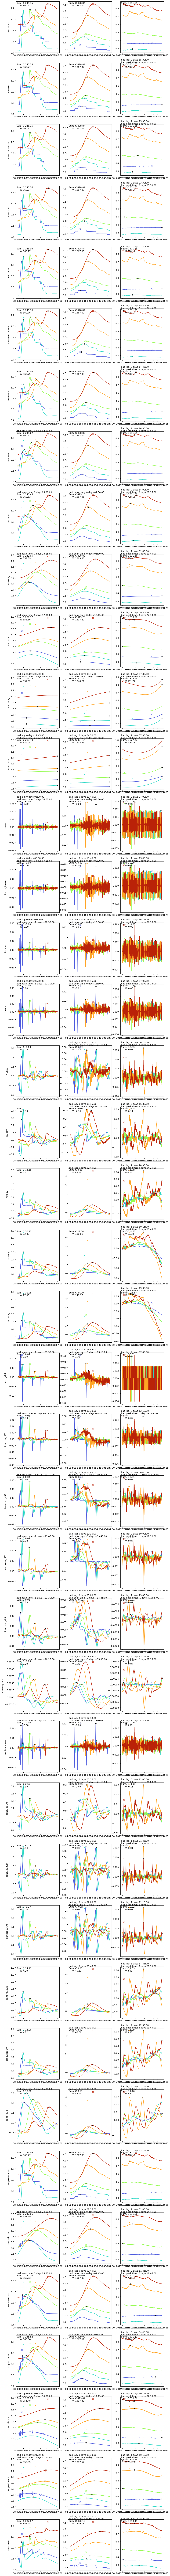

In [8]:
%matplotlib inline
# Plot three days of transformed data so we can see what it looks like transformed

max_length = None #Use None to plot everything in filter_list
plot_filters =  {k: filter_list[k] for k in list(filter_list)[:max_length]}
length = len(plot_filters)
threshold = pd.Timedelta('1 hour')

fig, axes = plt.subplots(ncols=3, nrows=length, figsize=(12, 5*length))

for row, (tag, data) in enumerate(plot_filters.items()):
    for col, (start, stop) in enumerate(sample_windows):
        for station in stations.index:
            plot_color = stations.loc[station, 'color']
            plot_data = data.loc[start:stop, station]
            
            axes[row,col].plot(plot_data, color=plot_color)
            x0 = maxes.loc[('raw_depth', col, station), 'time']
            y0 = maxes.loc[('raw_depth', col, station), 'peak']
            x = maxes.loc[(tag, col, station), 'time']
            y = maxes.loc[(tag, col, station), 'peak']
            if y < 0.5: # Fix scaling if filter produces very small y values.
                y0 = y
            axes[row,col].plot(x,y, 'k+')
            axes[row,col].plot(x0, y0, marker='x', color=plot_color)
        anno_text = ''
        if abs(lag_test.loc[(tag,col)]) > threshold:
            anno_text = f"bad lag: {lag_test.loc[(tag,col)]}"
        if abs(time_test.loc[(tag,col)]) > threshold:
            anno_text = anno_text + f"\nbad peak time: {time_test.loc[(tag,col)]}"
        axes[row,col].annotate(anno_text, 
                               xy=(0.01,0.99), xycoords='axes fraction',
                               xytext=(1.5, 1.5), textcoords='offset points')
        axes[row,col].annotate(f"Sum: C {maxes.loc[(tag, col, '01541200'), 'sum']:.2f}\n     W {maxes.loc[(tag, col, '01551500'), 'sum']:.2f}", 
                               xy=(0.01,0.90), xycoords='axes fraction',
                               xytext=(1.5, 1.5), textcoords='offset points')        
    axes[row,0].set_ylabel(f"{tag}")


# Example Plot for Manuscript

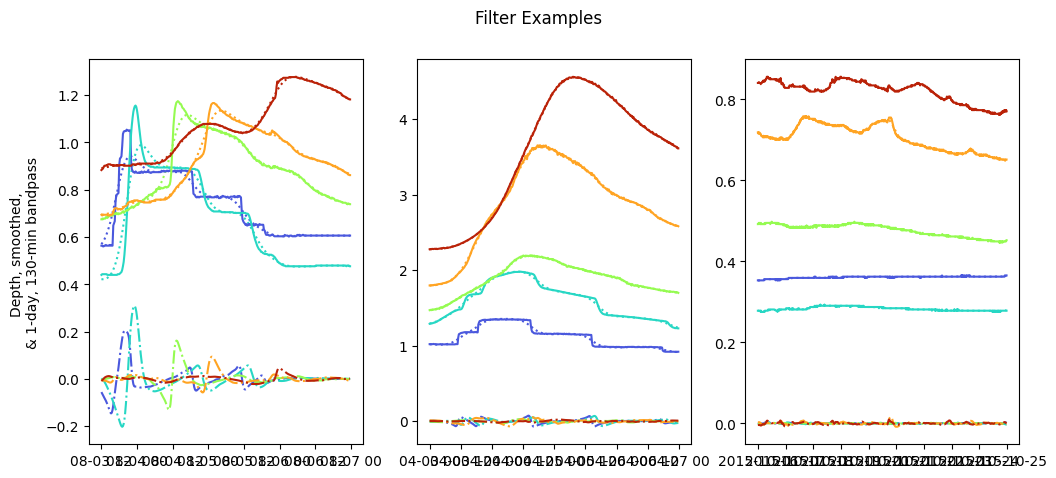

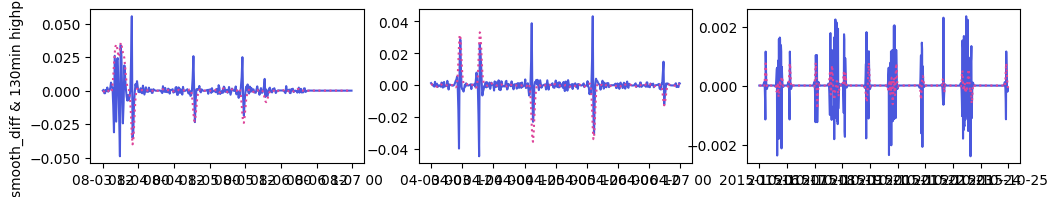

In [9]:
%matplotlib inline
# Plot three days of transformed data so we can see what it looks like transformed

plot_list = ['hi130m', 'low130m_diff', 'low886m', 'band1d130m', 'raw_depth']
filter_line_styles = ['solid', 'dotted', 'dotted','dashdot',  'solid']

max_length = None #Use None to plot everything in filter_list
plot_filters =  {k: filter_list[k] for k in plot_list}
length = len(plot_filters)
threshold = pd.Timedelta('1 hour')

#fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 3*length))
fig0, axes0 = plt.subplots(ncols=3, nrows=1, figsize=(12, 5))
fig1, axes1 = plt.subplots(ncols=3, nrows=1, figsize=(12, 2))
"""
fig, axd = plt.subplot_mosaic([['upper left', 'upper center', 'upper right'],
                               ['upper left', 'upper center', 'upper right'],
                               ['lower left', 'lower center', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
"""
fig0.suptitle('Filter Examples')

for row, (tag, data) in enumerate(plot_filters.items()):
    linestyle = filter_line_styles[row]
    for col, (start, stop) in enumerate(sample_windows):
        
        if tag in ['low130m_diff', 'hi130m']:
            station = '01541200'
            if tag == 'low130m_diff':
                plot_color = '#dd4499'
                plot_alpha = 1
            elif tag == 'hi130m':
                plot_color = '#4a58dd'
                plot_alpha = 1  #.5
            plot_data = data.loc[start:stop, station]
            axes1[col].plot(plot_data, color=plot_color, alpha=plot_alpha, linestyle=linestyle)
            axes1[0].set_ylabel(f"smooth_diff & 130min highpass")
        else:
            for station in stations.index:
                plot_color = stations.loc[station, 'color']
                plot_data = data.loc[start:stop, station]
                axes0[col].plot(plot_data, color=plot_color, linestyle=linestyle)
                axes0[0].set_ylabel(f"Depth, smoothed, \n& 1-day, 130-min bandpass")

#fig0.savefig("Figure_3a.png")
#fig1.savefig("Figure_3b.png")


In [10]:
stations#.loc['01541200', 'color']

name  position_nhd_m  gauge_datum_m  basin_area_km2  \
01541200  Curwensville          507322     342.796368           951.0   
01541303          Hyde          494288     333.420720          1228.0   
01542500      Karthaus          422588     253.163832          3787.0   
01545500        Renovo          367064     193.301112          7705.0   
01551500  Williamsport          273292     150.869904         14716.0   

          medianQ_cms    color  StageQ0root  StageMin  
01541200     9.967514  #4a58dd     0.579685  0.701040  
01541303    14.186717  #27d7c4     0.645428  0.835152  
01542500    40.209856  #95fb51    -0.016348  0.280416  
01545500    84.667232  #ffa423    -0.474518 -0.115824  
01551500   161.972096  #ba2208    -0.581263 -0.100584

In [11]:
sample_windows

[('2014-08-03 12:00', '2014-08-06'),
 ('2015-04-03', '2015-04-06'),
 ('2015-10-16', '2015-10-24')]

# Autocorrelation

In [12]:
for station in filter_list['raw_depth'].columns:
    sm.tsa.graphics.plot_acf(filter_list['raw_depth'][station], use_vlines=False, auto_ylims=True, fft=True, lags=140000, marker=None, linestyle='-' )

NameError: name 'sm' is not defined

In [ ]:
for station in filter_list['raw_depth'].columns:
    sm.tsa.graphics.plot_acf(filter_list['raw_depth'][station], use_vlines=False, auto_ylims=True, fft=True, lags=140000, marker=None, linestyle='-' )

In [ ]:
for station in filter_list['band1d130m'].columns:
    sm.tsa.graphics.plot_acf(filter_list['band1d130m'][station], use_vlines=False, auto_ylims=True, fft=True, lags=500)

In [ ]:
for station in filter_list['low1day'].columns:
    sm.tsa.graphics.plot_acf(filter_list['low1day'][station], use_vlines=False, auto_ylims=True, fft=True, lags=500)

In [ ]:
for station in filter_list['hi1day'].columns:
    sm.tsa.graphics.plot_acf(filter_list['hi1day'][station], use_vlines=False, auto_ylims=True, fft=True, lags=500)

In [ ]:
filter_list.keys()

In [ ]:
dir(sm.tsa.graphics.plot_acf)